In [68]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import xarray as xr
import matplotlib.pyplot as plt

from causaldynamics.systems import drive_sin
from causaldynamics.utils import set_rng_seed
from causaldynamics.scm import GrowingNetworkWithRedirection, get_root_nodes_mask, create_scm_graph
from causaldynamics.initialization import initialize_x, initialize_weights, initialize_biases, initialize_system_and_driver
from causaldynamics.mlp import propagate_mlp
from causaldynamics.plot import plot_trajectories, plot_scm, animate_3d_trajectories

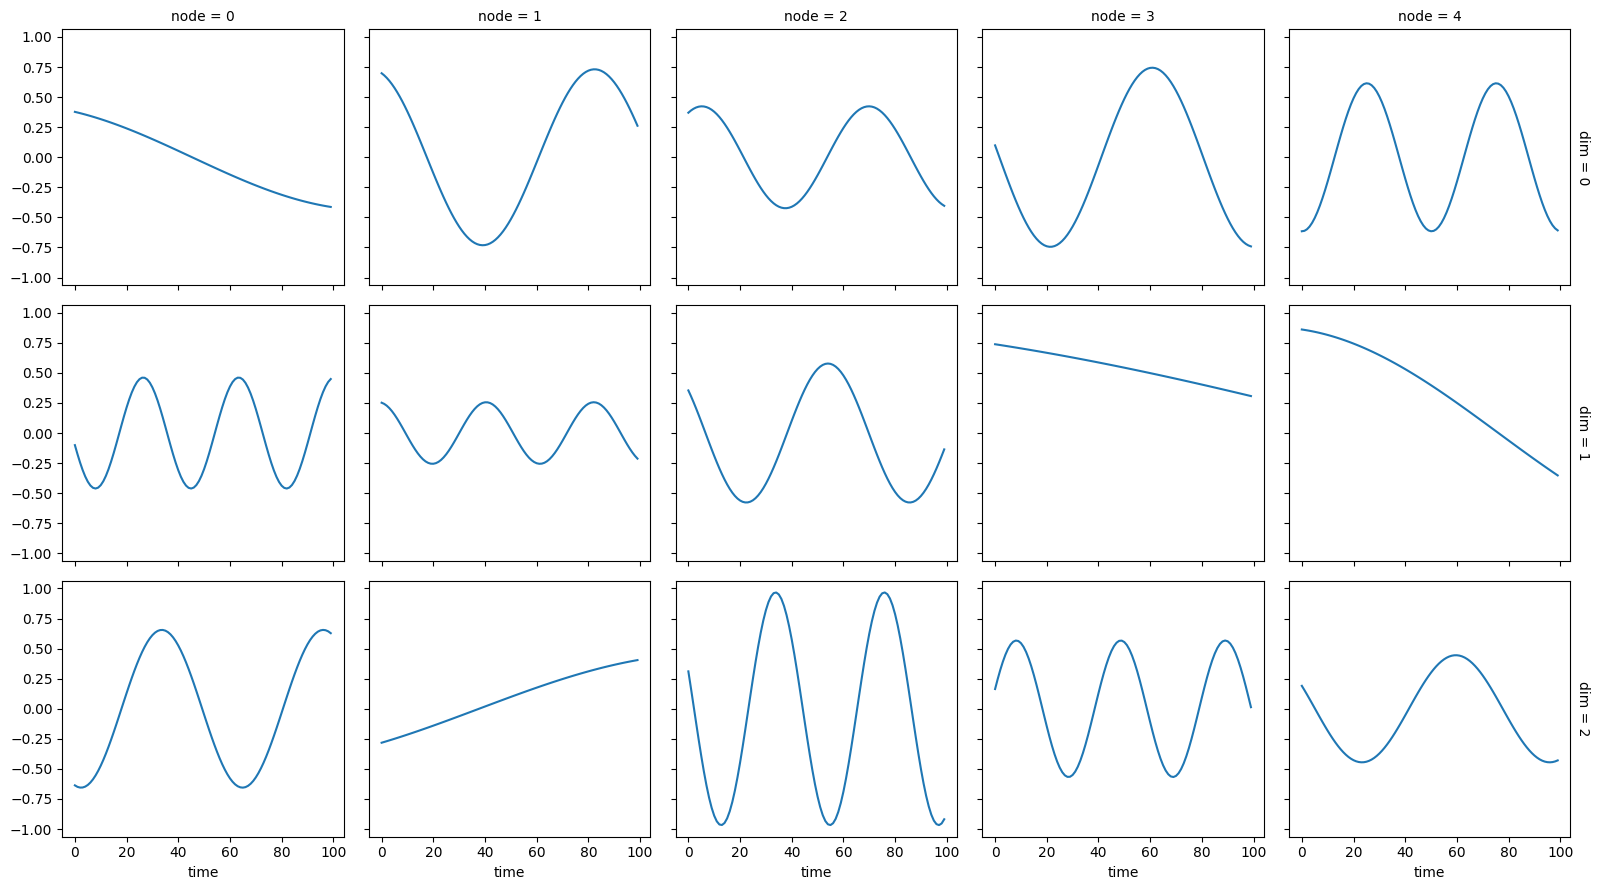

In [2]:
set_rng_seed(42)

num_timesteps = 100
num_nodes = 5
node_dim = 3

data = drive_sin(num_timesteps, num_nodes, node_dim, max_num_periods=10)
xr.DataArray(data.detach().cpu().numpy(), dims=['time', 'node', 'dim']).plot(row='dim', x='time', col='node')

In [3]:
# This takes a while to run...
num_nodes = 5
num_timesteps = 500
dimensions = 3
init_ratios = [1, 1] # Set ratios of dynamical systems and periodic drivers at root nodes. Here: equal ratio.

# Sample the SCM, all hyperoparameters and propagate the Lorenz attractor through the SCM
A = GrowingNetworkWithRedirection(num_nodes).generate()
W = initialize_weights(num_nodes, dimensions)
b = initialize_biases(num_nodes, dimensions)
sol = initialize_system_and_driver(num_timesteps, num_nodes, init_ratios=init_ratios, system_name='random', node_dim=dimensions, time_lag=0, device=None, make_trajectory_kwargs={})
init = initialize_x(sol, A)
x = propagate_mlp(A, W, b, init=init)
root_nodes = get_root_nodes_mask(A)
da = xr.DataArray(x, dims=['time', 'node', "dim"])


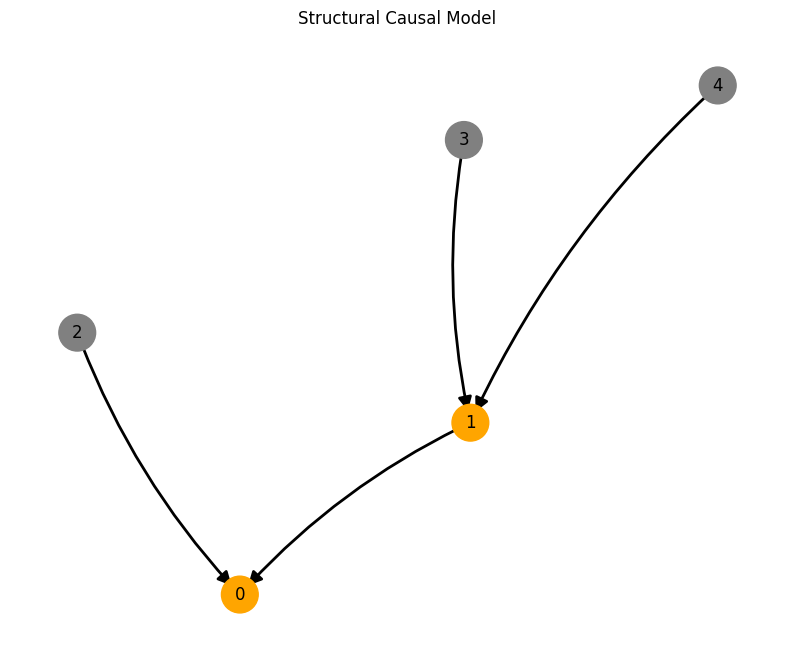

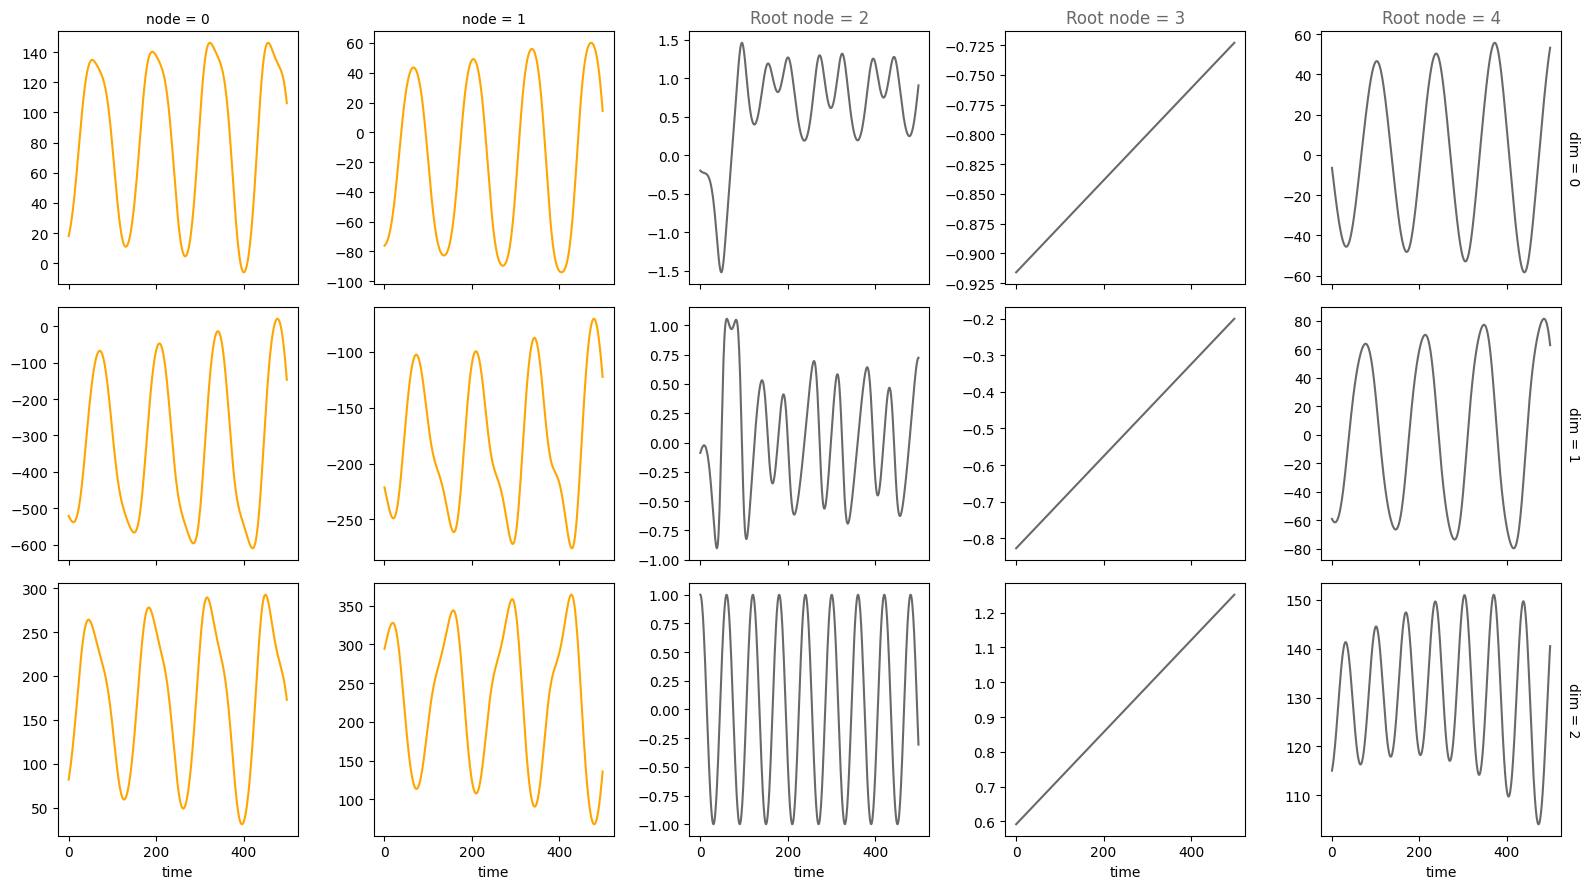

In [13]:
# Plot the SCM graph
plot_scm(G=create_scm_graph(A), root_nodes=root_nodes)
plt.show()

# Plot the trajectories
plot_trajectories(da, root_nodes, sharey=False)
plt.show()

# # Animate the trajectories
# anim = animate_3d_trajectories(da, frame_skip=2, rotate=True , show_history=True, plot_type='subplots', root_nodes=root_nodes)
# display(anim)
